# Part 1 : importing and reading the datasests

In [ ]:
import pandas as pd
import glob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np


In [ ]:

files = glob.glob('*.csv')

In [ ]:

files

['Youtube01.csv',
 'Youtube02.csv',
 'Youtube05.csv',
 'Youtube04.csv',
 'Youtube03.csv']

## Concatinating all the different datasets

In [ ]:

# waxaa sameenaa new var: all_df waa array, kushub all different datasets.
all_df = []
for i in files:
  all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR', 'DATE'],axis =1))

In [ ]:

# index: 0: file 1, 1: file2, 2: file 3 , 3: file 4, 4: file 5.
all_df[0]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


In [ ]:

data = pd.concat(all_df, axis = 0, ignore_index = True)

In [ ]:

data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,Like this comment for no reason﻿,1
1951,love this song﻿,0
1952,this song is awesome. these guys are the best....,1
1953,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1


# Part 2: checking null values

In [ ]:

data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

# Understaning data

In [ ]:

 data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

When we are trying to use Naive Beyes our target variable must be balanced or alittle bit....

# Part 3:  Splitting data into train and TEst

In [ ]:

inputs = data['CONTENT']
target = data['CLASS']

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, stratify = target, random_state = 365)

In [ ]:
y_train.value_counts()

1    803
0    761
Name: CLASS, dtype: int64

In [ ]:
y_test.value_counts()

1    201
0    190
Name: CLASS, dtype: int64

# Part 4:Changing comments to array(numerical)

## Applying CountVectorizer to my dataset(cooments)

In [ ]:

vectorizer = CountVectorizer()

In [ ]:

x_train_transf = vectorizer.fit_transform(x_train)

In [ ]:

x_test_transf =  vectorizer.transform(x_test)

In [ ]:

x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:

x_train_transf.shape

(1564, 3840)

In [ ]:

x_test_transf.shape

(391, 3840)

# Part 4: Building naive bayes model

In [ ]:

clf = MultinomialNB(class_prior=np.array([0.6, 0.4]))

In [ ]:

clf.fit(x_train_transf, y_train)

MultinomialNB(class_prior=array([0.6, 0.4]))

In [ ]:

clf.get_params()

{'alpha': 1.0,
 'class_prior': array([0.6, 0.4]),
 'fit_prior': True,
 'force_alpha': 'warn'}

In [ ]:

np.exp(clf.class_log_prior_)

array([0.6, 0.4])

## Confusion Metrix

In [ ]:

y_test_pred = clf.predict(x_test_transf)

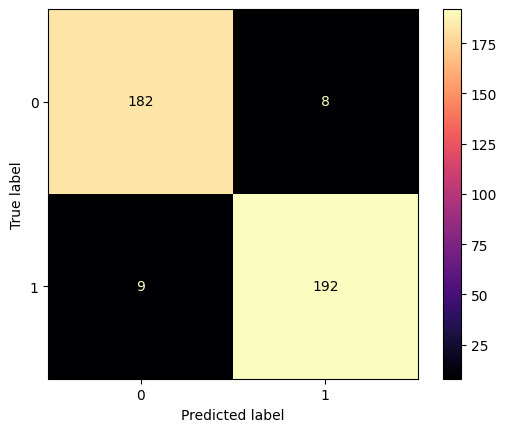

In [ ]:

ConfusionMatrixDisplay.from_predictions(
    # y_test: this is the actual value of the output
    # y_test_pred : this is the naive beyes prediction

    y_test , y_test_pred ,
    labels= clf.classes_,
    cmap = 'magma'

)

TN FP       
FN TP   

Accuray = correctly predicted Samples / All Samples


 Accuracy = TN + TP / ALL SAMPLES
 Accuracy = 161 + 190 / 391
 Accuracy = 0.897 lasoo buuxiye: 0.90


 Precision = TP / TP + FP
 Precision = 190 / 29 + 190
 Precision = 0.867 laso buxiye: 0.87

Recall = TP  / TP + FN
Recall = 190 / 190 + 11
Recall = 0.95



F1score = 2 / (1/precision ) + (1/recall)



In [ ]:

print(classification_report(y_test, y_test_pred, target_names = ['Ham', 'spam']))

              precision    recall  f1-score   support

         Ham       0.95      0.96      0.96       190
        spam       0.96      0.96      0.96       201

    accuracy                           0.96       391
   macro avg       0.96      0.96      0.96       391
weighted avg       0.96      0.96      0.96       391



# Part 5: Predicting Unseen data

In [ ]:

predict_data = vectorizer.transform(['This song is amazing',
                                     'You can win 1m dollars right now, just clck here!!!!',
                                     'good tutorial',
                                     'click here to win prizes'
                                     ])

In [ ]:

clf.predict(predict_data)

array([0, 1, 0, 1])

# Model Deployment

In [ ]:
# installing streamlit
!pip install -q streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.9 MB/s eta 0:00:00


In [10]:
# creating the script
%%writefile youtube_classification.py


import streamlit as st
import pandas as pd
import glob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Streamlit header
st.title("YouTube Comment Sentiment Classification")

# Load and preprocess data
files = glob.glob('*.csv')
all_df = [pd.read_csv(file).drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1) for file in files]
data = pd.concat(all_df, axis=0, ignore_index=True)

# Split data into inputs and target
inputs = data['CONTENT']
target = data['CLASS']
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, stratify=target, random_state=365)

# Vectorize text data
vectorizer = CountVectorizer()
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

# Train Naive Bayes classifier
clf = MultinomialNB(class_prior=np.array([0.6, 0.4]))
clf.fit(x_train_transf, y_train)

# Streamlit user interface for input and prediction
st.write("## Enter a comment for sentiment prediction")

# Initializing session state for user input
if 'user_input' not in st.session_state:
    st.session_state['user_input'] = ""

def update_input():
    st.session_state['user_input'] = st.session_state['input_text']

user_input = st.text_area("Comment", st.session_state['user_input'], height=100, key='input_text', on_change=update_input)

if st.button("Predict"):
    if st.session_state['user_input'].strip():
        predict_data = vectorizer.transform([st.session_state['user_input']])
        prediction = clf.predict(predict_data)

        result = 'Positive' if prediction[0] == 1 else 'Negative'
        result_color = 'green' if prediction[0] == 1 else 'red'

        st.markdown(f"<h2 style='color: {result_color}; font-size: 24px;'>Prediction: {result}</h2>", unsafe_allow_html=True)
    else:
        st.write("Please enter a comment to predict.")

# Style adjustments
st.markdown(
    """
    <style>
    .stTextArea textarea {
        font-size: 18px;
    }
    .stButton button {
        font-size: 18px;
        background-color: #4CAF50;
        color: white;
        border: none;
        padding: 10px 24px;
        text-align: center;
        text-decoration: none;
        display: inline-block;
        font-size: 16px;
        margin: 4px 2px;
        cursor: pointer;
        border-radius: 12px;
    }
    </style>
    """,
    unsafe_allow_html=True
)

Overwriting youtube_classification.py


In [ ]:
# running the app
!streamlit run youtube_classification.py &>/dev/null&

In [ ]:
# installing pyngrok
!pip install -q pyngrok

In [ ]:


# making the locally-hosted web application to be publicly accessible
from pyngrok import ngrok

ngrok.set_auth_token ('2czZtwjv30n8NKzmr9ddbhKECCe_5TwyAq5vC931maAmdJ8h4')

public_url = ngrok.connect('8501')
public_url

<NgrokTunnel: "https://23da-34-170-115-255.ngrok-free.app" -> "http://localhost:8501">

In [ ]:
# import pandas as pd
# import glob
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# import matplotlib.pyplot as plt
# import seaborn as sns

# import numpy as np

# files = glob.glob('*.csv')
# files
# # waxaa sameenaa new var: all_df waa array, kushub all different datasets.
# all_df = []
# for i in files:
#   all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR', 'DATE'],axis =1))
# # index: 0: file 1, 1: file2, 2: file 3 , 3: file 4, 4: file 5.
# all_df[0]
# data = pd.concat(all_df, axis = 0, ignore_index = True)
# data
# data.isnull().sum()
#  data['CLASS'].value_counts()
# inputs = data['CONTENT']
# target = data['CLASS']
# x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, stratify = target, random_state = 365)
# y_test.value_counts()
# vectorizer = CountVectorizer()
# x_train_transf = vectorizer.fit_transform(x_train)
# x_test_transf =  vectorizer.transform(x_test)
# x_train_transf.toarray()
# x_train_transf.shape
# x_test_transf.shape
# clf = MultinomialNB(class_prior=np.array([0.6, 0.4]))
# clf.fit(x_train_transf, y_train)
# clf.get_params()
# np.exp(clf.class_log_prior_)
# y_test_pred = clf.predict(x_test_transf)
# ConfusionMatrixDisplay.from_predictions(
#     # y_test: this is the actual value of the output
#     # y_test_pred : this is the naive beyes prediction

#     y_test , y_test_pred ,
#     labels= clf.classes_,
#     cmap = 'magma'

# )
# print(classification_report(y_test, y_test_pred, target_names = ['Ham', 'spam']))
# predict_data = vectorizer.transform(['This song is amazing',
#                                      'You can win 1m dollars right now, just clck here!!!!',
#                                      'good tutorial',
#                                      'click here to win prizes'
#                                      ])
# clf.predict(predict_data)